In [1]:
%run Global.ipynb

In [2]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "train_df.csv", keep_default_na=False)

X = train_df_ohe_selected.iloc[:,:-1] # (transformed) attributes
y = train_df_ohe_selected.iloc[:,-1]  # ground truth labels

In [3]:
# run in terminal: python -m pip install mlxtend
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-3-stacked-cv-classification-and-gridsearch
import mlxtend
from mlxtend.classifier import StackingCVClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

## StackingClf1 - 3 Base Classifiers

In [6]:
mnb = MultinomialNB()
linearSVM = svm.LinearSVC(random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)

In [7]:
# tune hyperparameters
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.5, 1], 'logisticregression__C': [1, 5]}
sclf3 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
sclf3.meta_classifier = CategoricalNB()
grid = tune_hyperparameter(sclf3, param_grid, X, y, cv=2)
print(max(grid['mean_test_accuracy']))
grid.loc[grid['mean_test_accuracy'] == max(grid['mean_test_accuracy'])]['params'].values

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=   8.3s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=   8.8s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=   8.3s
[CV] END linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=   8.9s
[CV] END linearsvc__C=1, logisticregression__C=5, multinomialnb__alpha=0.5; total time=  11.4s
[CV] END linearsvc__C=1, logisticregression__C=5, multinomialnb__alpha=0.5; total time=  10.7s
[CV] END linearsvc__C=1, logisticregression__C=5, multinomialnb__alpha=1; total time=  10.8s
[CV] END linearsvc__C=1, logisticregression__C=5, multinomialnb__alpha=1; total time=  11.4s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  11.2s
[CV] END linearsvc__C=5, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  11.3

array([{'linearsvc__C': 5, 'logisticregression__C': 5, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 240.31292510032654 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.714286    0.229983      0.347938       0.746622    0.954349   
1       0.709302    0.207836      0.321476       0.744976    0.960518   
2       0.685714    0.204778      0.315375       0.741643    0.958051   
3       0.678363    0.197952      0.306473       0.741429    0.960518   
4       0.754491    0.215017      0.334661       0.744186    0.967304   
5       0.668712    0.186007      0.291055       0.740582    0.958051   
6       0.722973    0.182594      0.291553       0.740094    0.967921   
7       0.736196    0.204778      0.320427       0.743966    0.969772   
8       0.699422    0.206133      0.318421       0.741659    0.960494   
9       0.703226    0.185690      0.293801       0.740038    0.962963   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837801       0.456522    0.212121      0.289655  0.7

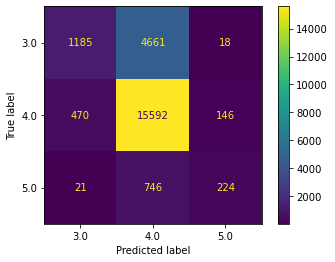

,mean,std
3.0_precision,0.707268,0.026313
3.0_recall,0.202077,0.014658
3.0_f1-score,0.314118,0.018833
4.0_precision,0.742519,0.002266
4.0_recall,0.961994,0.004954
4.0_f1-score,0.838119,0.002160
5.0_precision,0.580559,0.067578
5.0_recall,0.226071,0.036532
5.0_f1-score,0.324022,0.043249
accuracy,0.737155,0.003632


In [8]:
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(random_state=30027, C=5)
logr = LogisticRegression(solver='sag', max_iter=50, C=5, random_state = 30027)

sclf3 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred3, sclf3_report = cross_val_report(sclf3, X, y)
sclf3_report

## StackingClf2 - 4 Base Classifiers

### Observe DT's performance

DecisionTreeClassifier prediction took 19.28860902786255 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412651    0.233390      0.298150       0.730093    0.871067   
1       0.456026    0.238501      0.313199       0.732179    0.887107   
2       0.423948    0.223549      0.292737       0.730710    0.882171   
3       0.415584    0.218430      0.286353       0.730710    0.882171   
4       0.461806    0.226962      0.304348       0.733367    0.897594   
5       0.455197    0.216724      0.293642       0.732458    0.895126   
6       0.403785    0.218430      0.283499       0.725691    0.874769   
7       0.427692    0.237201      0.305159       0.731282    0.879704   
8       0.455128    0.241908      0.315907       0.734558    0.888272   
9       0.428571    0.240204      0.307860       0.730093    0.871605   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.794374       0.341463    0.141414      0.200000  0.

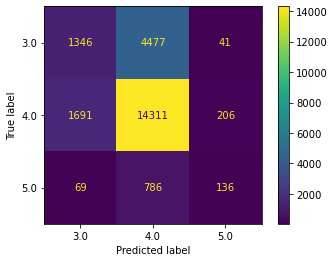

,mean,std
3.0_precision,0.434039,0.021166
3.0_recall,0.229530,0.009855
3.0_f1-score,0.300086,0.011003
4.0_precision,0.731114,0.002397
4.0_recall,0.882959,0.009171
4.0_f1-score,0.799882,0.004884
5.0_precision,0.353119,0.043845
5.0_recall,0.137253,0.029506
5.0_f1-score,0.197112,0.036396
accuracy,0.684777,0.006465


In [9]:
# look at dt's performance
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 200, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

DecisionTreeClassifier prediction took 20.563260078430176 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412979    0.238501      0.302376       0.729632    0.867366   
1       0.450000    0.245315      0.317530       0.733367    0.884022   
2       0.403175    0.216724      0.281909       0.727459    0.876002   
3       0.417178    0.232082      0.298246       0.731266    0.872918   
4       0.459016    0.238908      0.314254       0.735234    0.890808   
5       0.459930    0.225256      0.302405       0.733536    0.893276   
6       0.413793    0.225256      0.291713       0.726807    0.874769   
7       0.425926    0.235495      0.303297       0.731282    0.879704   
8       0.446541    0.241908      0.313812       0.734391    0.885802   
9       0.428135    0.238501      0.306346       0.729758    0.873457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.792559       0.341463    0.141414      0.200000  0

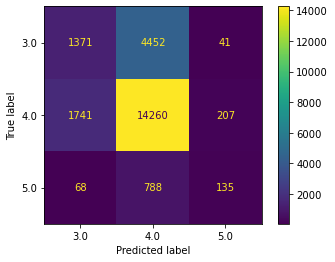

,mean,std
3.0_precision,0.431667,0.020656
3.0_recall,0.233795,0.008895
3.0_f1-score,0.303189,0.010859
4.0_precision,0.731273,0.002875
4.0_recall,0.879812,0.008423
4.0_f1-score,0.798687,0.004918
5.0_precision,0.353311,0.052811
5.0_recall,0.136263,0.025467
5.0_f1-score,0.196137,0.032912
accuracy,0.683606,0.006790


In [10]:
# look at dt's performance
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 400, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

### Train StackingClf2

In [11]:
# tune hyperparameters
sclf4 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
param_grid = {'linearsvc__C': [1,5], 'multinomialnb__alpha': [0.5, 1], 'logisticregression__C': [1, 5], 'decisiontreeclassifier__max_depth': [200, 400], 'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss']}
grid4 = tune_hyperparameter(sclf4, param_grid, X, y, cv=2)
print(max(grid4['mean_test_accuracy']))
grid4.loc[grid4['mean_test_accuracy'] == max(grid4['mean_test_accuracy'])]['params'].values

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=   9.7s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  10.1s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=  10.2s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=  10.5s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=200, linearsvc__C=1, logisticregression__C=5, multinomialnb__alpha=0.5; total time=  11.7s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__

[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=200, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  13.9s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=   9.9s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=0.5; total time=  10.2s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=   9.6s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregression__C=1, multinomialnb__alpha=1; total time=  10.1s
[CV] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=400, linearsvc__C=1, logisticregres

[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  19.0s
[CV] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=400, linearsvc__C=5, logisticregression__C=5, multinomialnb__alpha=1; total time=  23.7s
0.7342929703166656


array([{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 200, 'linearsvc__C': 5, 'logisticregression__C': 1, 'multinomialnb__alpha': 1}],
      dtype=object)

StackingCVClassifier prediction took 325.4021580219269 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743541    0.958667   
1       0.708333    0.202726      0.315232       0.741584    0.964837   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.739934    0.963603   
4       0.754491    0.215017      0.334661       0.743250    0.967921   
5       0.666667    0.184300      0.288770       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739539    0.970389   
7       0.713415    0.199659      0.312000       0.742439    0.969155   
8       0.707602    0.206133      0.319261       0.741445    0.962963   
9       0.707792    0.185690      0.294197       0.739336    0.962963   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837510       0.500000    0.181818      0.266667  0.73

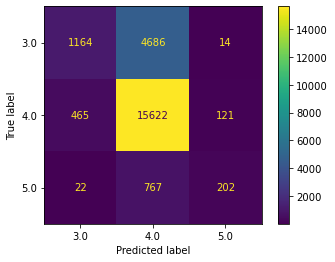

,mean,std
3.0_precision,0.705242,0.024722
3.0_recall,0.198496,0.012962
3.0_f1-score,0.309620,0.016917
4.0_precision,0.741260,0.001497
4.0_recall,0.963845,0.004297
4.0_f1-score,0.838020,0.001874
5.0_precision,0.604271,0.076078
5.0_recall,0.203848,0.036589
5.0_f1-score,0.303082,0.043599
accuracy,0.736591,0.003113


In [12]:
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual=False,random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 200, random_state = 30027)

sclf4 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred4, sclf4_report = cross_val_report(sclf4, X, y)
sclf4_report

### Diversity

MultinomialNB prediction took 0.9820811748504639 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

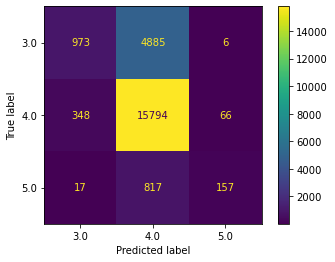

LinearSVC prediction took 7.662179231643677 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1   

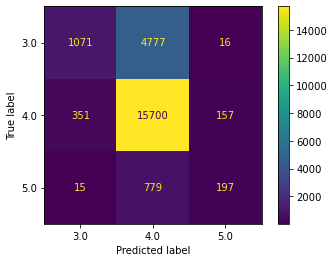

LogisticRegression prediction took 71.98373675346375 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

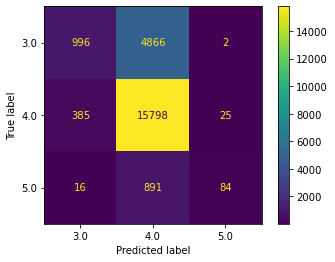

DecisionTreeClassifier prediction took 18.88259196281433 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412651    0.233390      0.298150       0.730093    0.871067   
1       0.456026    0.238501      0.313199       0.732179    0.887107   
2       0.423948    0.223549      0.292737       0.730710    0.882171   
3       0.415584    0.218430      0.286353       0.730710    0.882171   
4       0.461806    0.226962      0.304348       0.733367    0.897594   
5       0.455197    0.216724      0.293642       0.732458    0.895126   
6       0.403785    0.218430      0.283499       0.725691    0.874769   
7       0.427692    0.237201      0.305159       0.731282    0.879704   
8       0.455128    0.241908      0.315907       0.734558    0.888272   
9       0.428571    0.240204      0.307860       0.730093    0.871605   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.794374       0.341463    0.141414      0.200000  0.

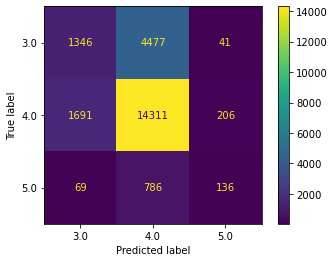

,mnb,svm,logr,dt
mnb,0,528,652,3296
svm,528,0,597,3252
logr,652,597,0,3122
dt,3296,3252,3122,0


In [19]:
clfs = ["mnb", "svm", "logr", "dt"]
preds1 = [cross_val_report(clf, X, y)[0] for clf in [mnb, linearSVM, logr, dt]]
predictions1 = pd.DataFrame({clfs[i]:preds1[i] for i in range(len(clfs))})
differences1 = {clf:[] for clf in clfs}
for clf1 in clfs: 
    for clf2 in clfs: 
        differences1[clf1].append(sum(predictions1[clf1] != predictions1[clf2]))
differences1 = pd.DataFrame(differences1, index = clfs)
differences1.style.background_gradient(cmap='Blues')

## Comparison between SVM, StackingClf1, StackingClf2

In [24]:
# tune svm
linearSVM = svm.LinearSVC(dual=False, random_state=30027)
param_grid = {'C': [1,3,5]}
grid_svm = tune_hyperparameter(linearSVM, param_grid, X, y, cv=4)
print(max(grid_svm['mean_test_accuracy']))
grid_svm.loc[grid_svm['mean_test_accuracy'] == max(grid_svm['mean_test_accuracy'])]['params'].values

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=3; total time=   0.5s
[CV] END ................................................C=3; total time=   0.6s
[CV] END ................................................C=3; total time=   0.6s
[CV] END ................................................C=3; total time=   0.5s
[CV] END ................................................C=5; total time=   0.6s
[CV] END ................................................C=5; total time=   0.6s
[CV] END ................................................C=5; total time=   0.6s
[CV] END ........................................

array([{'C': 5}], dtype=object)

LinearSVC prediction took 7.199770927429199 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1   

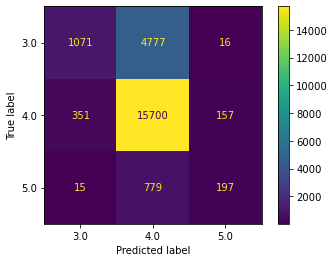

,mean,std
3.0_precision,0.745444,0.027452
3.0_recall,0.182638,0.012669
3.0_f1-score,0.293232,0.017548
4.0_precision,0.738619,0.002165
4.0_recall,0.968657,0.003912
4.0_f1-score,0.838137,0.002178
5.0_precision,0.533414,0.068645
5.0_recall,0.198859,0.041218
5.0_f1-score,0.288069,0.049969
accuracy,0.735724,0.003412


In [25]:
# look at linear SVM performance
linearSVM = svm.LinearSVC(dual=False, C=5, random_state=30027)
y_pred_svm, svm_report = cross_val_report(linearSVM, X, y)
svm_report

       Metrics    SVM  Stacking_Clf_1  Stacking_Clf_2
0  3-precision  0.745           0.706           0.706
1     3-recall  0.183           0.198           0.198
2  4-precision  0.739           0.742           0.741
3     4-recall  0.969           0.961           0.964
4  5-precision  0.533           0.560           0.606
5     5-recall  0.199           0.230           0.201
6     accuracy  0.736           0.736           0.737


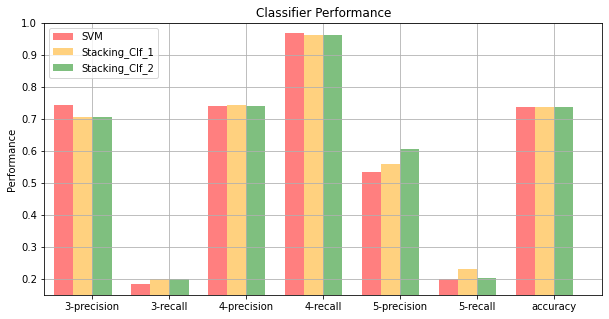

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
performances = {'Metrics': ['3-precision', '3-recall', '4-precision', '4-recall', '5-precision', '5-recall','accuracy'],
                'SVM': [0.745, 0.183, 0.739, 0.969, 0.533, 0.199, 0.736],
                'Stacking_Clf_1': [0.706, 0.198, 0.742, 0.961, 0.56, 0.23, 0.736],
                'Stacking_Clf_2': [0.706, 0.198, 0.741, 0.964, 0.606, 0.201, 0.737]}
performance_df = pd.DataFrame(performances, columns = ['Metrics', 'SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'])
print(performance_df)

pos = list(range(len(performance_df['SVM'])))
width = 0.25

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, performance_df['SVM'], width, alpha=0.5, color='Red')
plt.bar([p+width for p in pos], performance_df['Stacking_Clf_1'], width, alpha=0.5, color='Orange')
plt.bar([p+width*2 for p in pos], performance_df['Stacking_Clf_2'], width, alpha=0.5, color='Green')
ax.set_ylabel('Performance')
ax.set_title('Classifier Performance')
ax.set_xticks([p+1.5*width for p in pos])
ax.set_xticklabels(performance_df['Metrics'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0.15, 1])

plt.legend(['SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'], loc='upper left')
plt.grid()
plt.show()

## using different number of feature selection

selected 50 features

StackingCVClassifier prediction took 883.579668045044 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743308    0.959284   
1       0.708333    0.202726      0.315232       0.741232    0.964837   
2       0.682081    0.201365      0.310935       0.741305    0.959901   
3       0.680723    0.192833      0.300532       0.739810    0.962986   
4       0.754491    0.215017      0.334661       0.743371    0.968538   
5       0.670807    0.184300      0.289157       0.740229    0.958051   
6       0.724138    0.179181      0.287278       0.739539    0.970389   
7       0.713415    0.199659      0.312000       0.742088    0.969155   
8       0.707602    0.206133      0.319261       0.741216    0.963580   
9       0.707792    0.185690      0.294197       0.739934    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837598       0.500000    0.17171

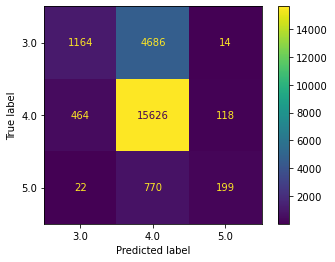

                   mean       std
3.0_precision  0.705657  0.024029
3.0_recall     0.198496  0.012962
3.0_f1-score   0.309659  0.016864
4.0_precision  0.741203  0.001382
4.0_recall     0.964092  0.004272
4.0_f1-score   0.838077  0.001846
5.0_precision  0.605562  0.071182
5.0_recall     0.200818  0.039161
5.0_f1-score   0.299597  0.045616
accuracy       0.736634  0.003063


selected 100 features

StackingCVClassifier prediction took 235.8875858783722 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.684729    0.236797      0.351899       0.745894    0.952498   
1       0.682796    0.216354      0.328590       0.746032    0.956817   
2       0.688525    0.215017      0.327698       0.743295    0.957434   
3       0.640449    0.194539      0.298429       0.739151    0.956200   
4       0.748571    0.223549      0.344284       0.743943    0.966070   
5       0.674157    0.204778      0.314136       0.743897    0.958667   
6       0.701863    0.192

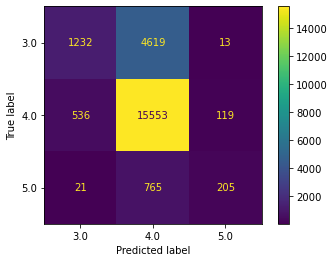

                   mean       std
3.0_precision  0.688957  0.027511
3.0_recall     0.210092  0.014671
3.0_f1-score   0.321773  0.018530
4.0_precision  0.742857  0.002345
4.0_recall     0.959588  0.004729
4.0_f1-score   0.837419  0.002039
5.0_precision  0.606736  0.083956
5.0_recall     0.206879  0.047748
5.0_f1-score   0.307118  0.060529
accuracy       0.736678  0.003686


selected 200 features

StackingCVClassifier prediction took 336.67590498924255 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.683486    0.253833      0.370186       0.748418    0.948797   
1       0.660099    0.228279      0.339241       0.747215    0.951882   
2       0.681592    0.233788      0.348158       0.745894    0.952498   
3       0.629032    0.199659      0.303109       0.739904    0.949414   
4       0.740933    0.244027      0.367137       0.749157    0.959901   
5       0.666667    0.218430      0.329049       0.746854    0.951882   
6       0.684524    0.19

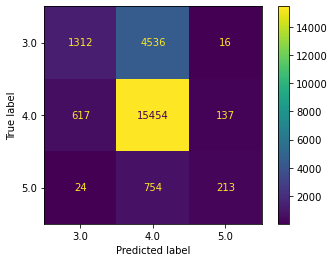

                   mean       std
3.0_precision  0.671693  0.030981
3.0_recall     0.223735  0.018562
3.0_f1-score   0.335409  0.023446
4.0_precision  0.744997  0.003225
4.0_recall     0.953479  0.005136
4.0_f1-score   0.836435  0.002977
5.0_precision  0.585809  0.081101
5.0_recall     0.214960  0.039411
5.0_f1-score   0.312833  0.047635
accuracy       0.736201  0.004846


selected 300 features

StackingCVClassifier prediction took 386.0293798446655 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.642276    0.269165      0.379352       0.751488    0.934608   
1       0.673171    0.235094      0.348485       0.749757    0.950031   
2       0.679245    0.245734      0.360902       0.747455    0.951265   
3       0.616162    0.208191      0.311224       0.738462    0.947563   
4       0.704762    0.252560      0.371859       0.750485    0.953732   
5       0.642157    0.223549      0.331646       0.743614    0.951882   
6       0.662983    0.204

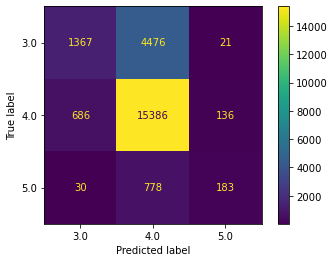

                   mean       std
3.0_precision  0.656274  0.024971
3.0_recall     0.233115  0.021161
3.0_f1-score   0.343619  0.024505
4.0_precision  0.745480  0.004882
4.0_recall     0.949284  0.006446
4.0_f1-score   0.835108  0.003556
5.0_precision  0.556925  0.112548
5.0_recall     0.184687  0.036708
5.0_f1-score   0.274116  0.043536
accuracy       0.734336  0.005681




In [33]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier

mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual = False, random_state = 30027)
logr = LogisticRegression(solver='sag', max_iter=50, random_state = 30027)
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 200, random_state = 30027)
sclf = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)

nums = ['50', '100', '200', '300']
train_dfs = [pd.read_csv("./Datasets/train_df_"+num+".csv", keep_default_na=False) for num in nums]

for i in range(4): 
    print("================================================================================")
    print(f'selected {nums[i]} features\n')
    train_df = train_dfs[i]
    X_train = train_df.iloc[:,:-1]
    y_train = train_df.iloc[:,-1]
    _, report = cross_val_report(sclf, X_train, y_train)
    print(report)
    print('\n================================================================================\n')